In [177]:
import os, sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import ast
from skimage import io
from skimage.color import gray2rgb

In [ ]:
max_width = 47000
max_height = 23300
width_200 = 44106
height_200 = 20154
x_offset = (max_width - width_200) // 1
y_offset = (max_height - height_200) // 1

In [204]:
HOME = os.path.expanduser("~")
DIR = os.path.join(HOME, 'programming/pipeline_utility')
OUTPUT = os.path.join(HOME, 'tmp')
sys.path.append(DIR)
from utilities.contour_utilities import get_contours_from_annotations, add_structure_to_neuroglancer, \
    create_full_volume, get_structure_colors
from utilities.imported_atlas_utilities import get_all_structures
color_radius = 3
xy_ng_resolution_um = 5
color_radius = 3
animal = 'MD594'

CSV_PATH = '/net/birdstore/Active_Atlas_Data/data_root/atlas_data/foundation_brain_annotations'
csvfile = os.path.join(CSV_PATH, f'{animal}_annotation.csv')
hand_annotations = pd.read_csv(csvfile)
hand_annotations['vertices'] = hand_annotations['vertices'] \
    .apply(lambda x: x.replace(' ', ','))\
    .apply(lambda x: x.replace('\n',','))\
    .apply(lambda x: x.replace(',]',']'))\
    .apply(lambda x: x.replace(',,', ','))\
    .apply(lambda x: x.replace(',,', ','))\
    .apply(lambda x: x.replace(',,', ',')).apply(lambda x: x.replace(',,', ','))

hand_annotations['vertices'] = hand_annotations['vertices'].apply(lambda x: ast.literal_eval(x))

In [249]:
idx = 220
df = hand_annotations.loc[hand_annotations['section'] == idx]
#[df['column_name'] == some_value]
df[['name', 'side','section','vertices','creator']].sort_values(by=['name','section']).head(20)
#hand_annotations.head()

,name,side,section,vertices,creator
540,10N,L,220,"[[30526.42457282, 9672.83706131], [30281.91297...",yuncong
1596,12N,S,220,"[[30407.20243878, 9977.59579388], [30288.58851...",yuncong
1895,3N,L,220,"[[23022.15043978, 9001.97915638], [22876.59258...",yuncong
523,6N,L,220,"[[27248.48191239, 9881.61239514], [27317.29014...",yuncong
258,DRD,L,220,"[[23536.38800747, 7753.9380613], [23525.260764...",yuncong
1088,DTgC,L,220,"[[25697.59943458, 8806.58854626], [25694.41329...",yuncong
232,DTgP,L,220,"[[25812.68333777, 8682.04940246], [25732.18393...",yuncong
63,EW,L,220,"[[21874.68753026, 9794.5419387], [22065.822795...",yuncong
634,IC,S,220,"[[24553.34888698, 3891.95715079], [24711.41600...",yuncong
197,IF,L,220,"[[22065.86618189, 10946.58168623], [22277.3282...",yuncong


In [229]:
structures = ['SC', 'IC']

In [250]:
filepath = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{}/preps/CH1/thumbnail/{}.tif'.format(animal,idx)
img = io.imread(filepath)
img = gray2rgb(img)
img.shape

(615, 1355, 3)

In [192]:
#structures_arr = hand_annotations.name.unique()
#structures = structures_arr.tolist()
colors = get_structure_colors()

In [251]:
for structure in structures:
    try:
        color = colors[structure.upper()]
    except:
        sided = '{}_R'.format(structure)
        color = colors[sided]
    contour_annotations, first_sec, last_sec = get_contours_from_annotations(animal, structure, hand_annotations, densify=4)
    pts = contour_annotations[idx][structure][1]
    #pts = [[a[0] - x_offset,a[1]-y_offset] for a in pts]
    """
    i=0
    for k,v in contour_annotations.items():
        print(k,v)
        i+=1
        if i > 2:
            break
    """
    points = np.array(pts,dtype=np.int32)
    points = points // 32
    cv2.polylines(img, [points], isClosed=True, color=(0,0,0), thickness=2 )

In [253]:
outpath = os.path.join(OUTPUT, f'{animal}_{idx}.tif')
cv2.imwrite(outpath, img)

True

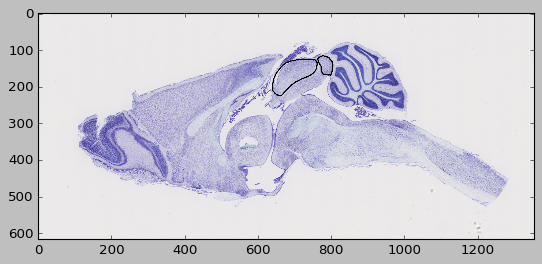

In [252]:
plt.imshow(img, cmap="gray")
plt.show()